In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("C:/Users/Kahad_09/OneDrive - University at Buffalo/Desktop/MIT Data Science/urban_pop_growth.csv")
df.head()

,Years,pop_growth
0,1961,5.169664
1,1962,4.715338
2,1963,4.673762
3,1964,4.654157
4,1965,4.645418


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Years       64 non-null     int64  
 1   pop_growth  64 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [12]:
df['Years'] = pd.to_datetime(df['Years'], format = '%Y')
df.set_index('Years', inplace = True)
df.head()

,pop_growth
Years,
1961-01-01,5.169664
1962-01-01,4.715338
1963-01-01,4.673762
1964-01-01,4.654157
1965-01-01,4.645418


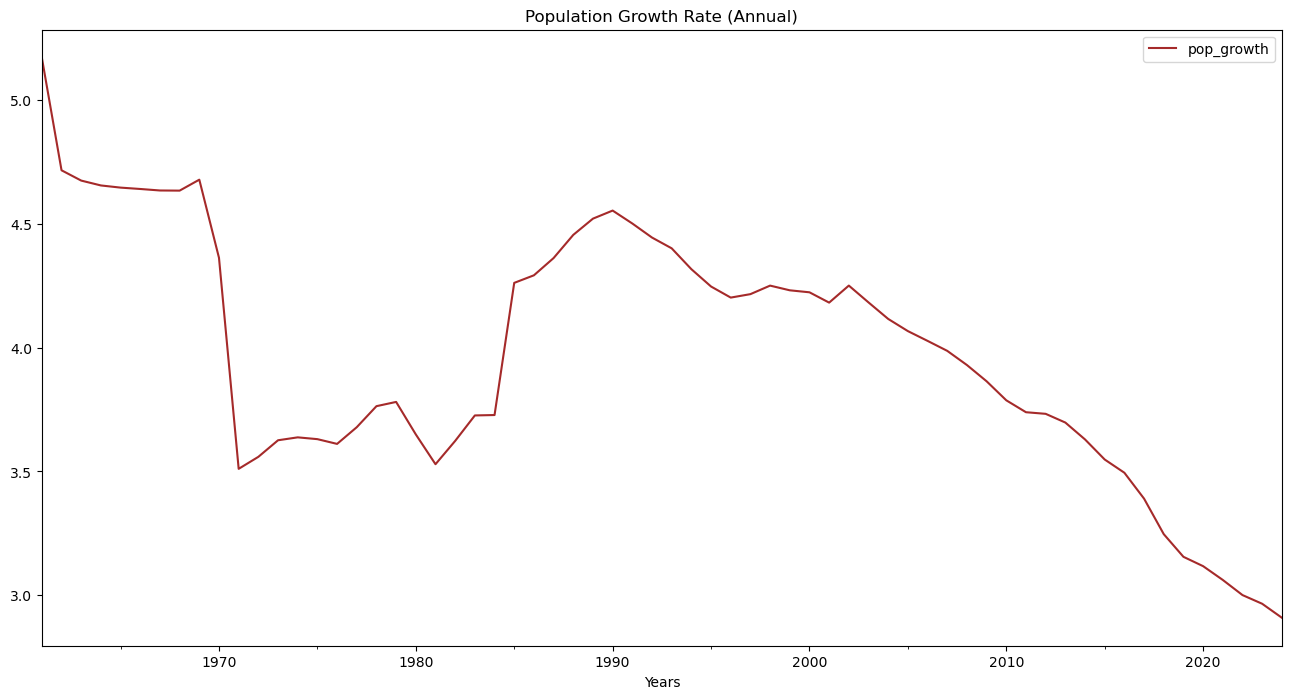

In [14]:
ax = df.plot(color = 'brown', figsize = (16,8))
ax.set_title ('Population Growth Rate (Annual)')
plt.show()

In [15]:
from statsmodels.graphics import tsaplots       # Module to create ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA   # Module to build AR, MA, ARMA, and ARIMA models
from sklearn.metrics import mean_squared_error  # Module to implement MSE and RSME during model evaluation
from statsmodels.graphics import tsaplots       # Module to create ACF and PACF plots
import statsmodels.api as sm                    # Library to do time series decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decom = sm.tsa.seasonal_decompose(df)  # Using seasonal_decompose function to decompose the time series into its individual components

In [18]:
decom_data = pd.DataFrame()                  #extract and store trend, seasonal, and rn in dataframe, so create empty dataframe
decom_data['trend'] = decom.trend            #extract the trend
decom_data['seasonal'] = decom.seasonal      #extract the seasonality
decom_data['random_noise'] = decom.resid     #extract the random noise

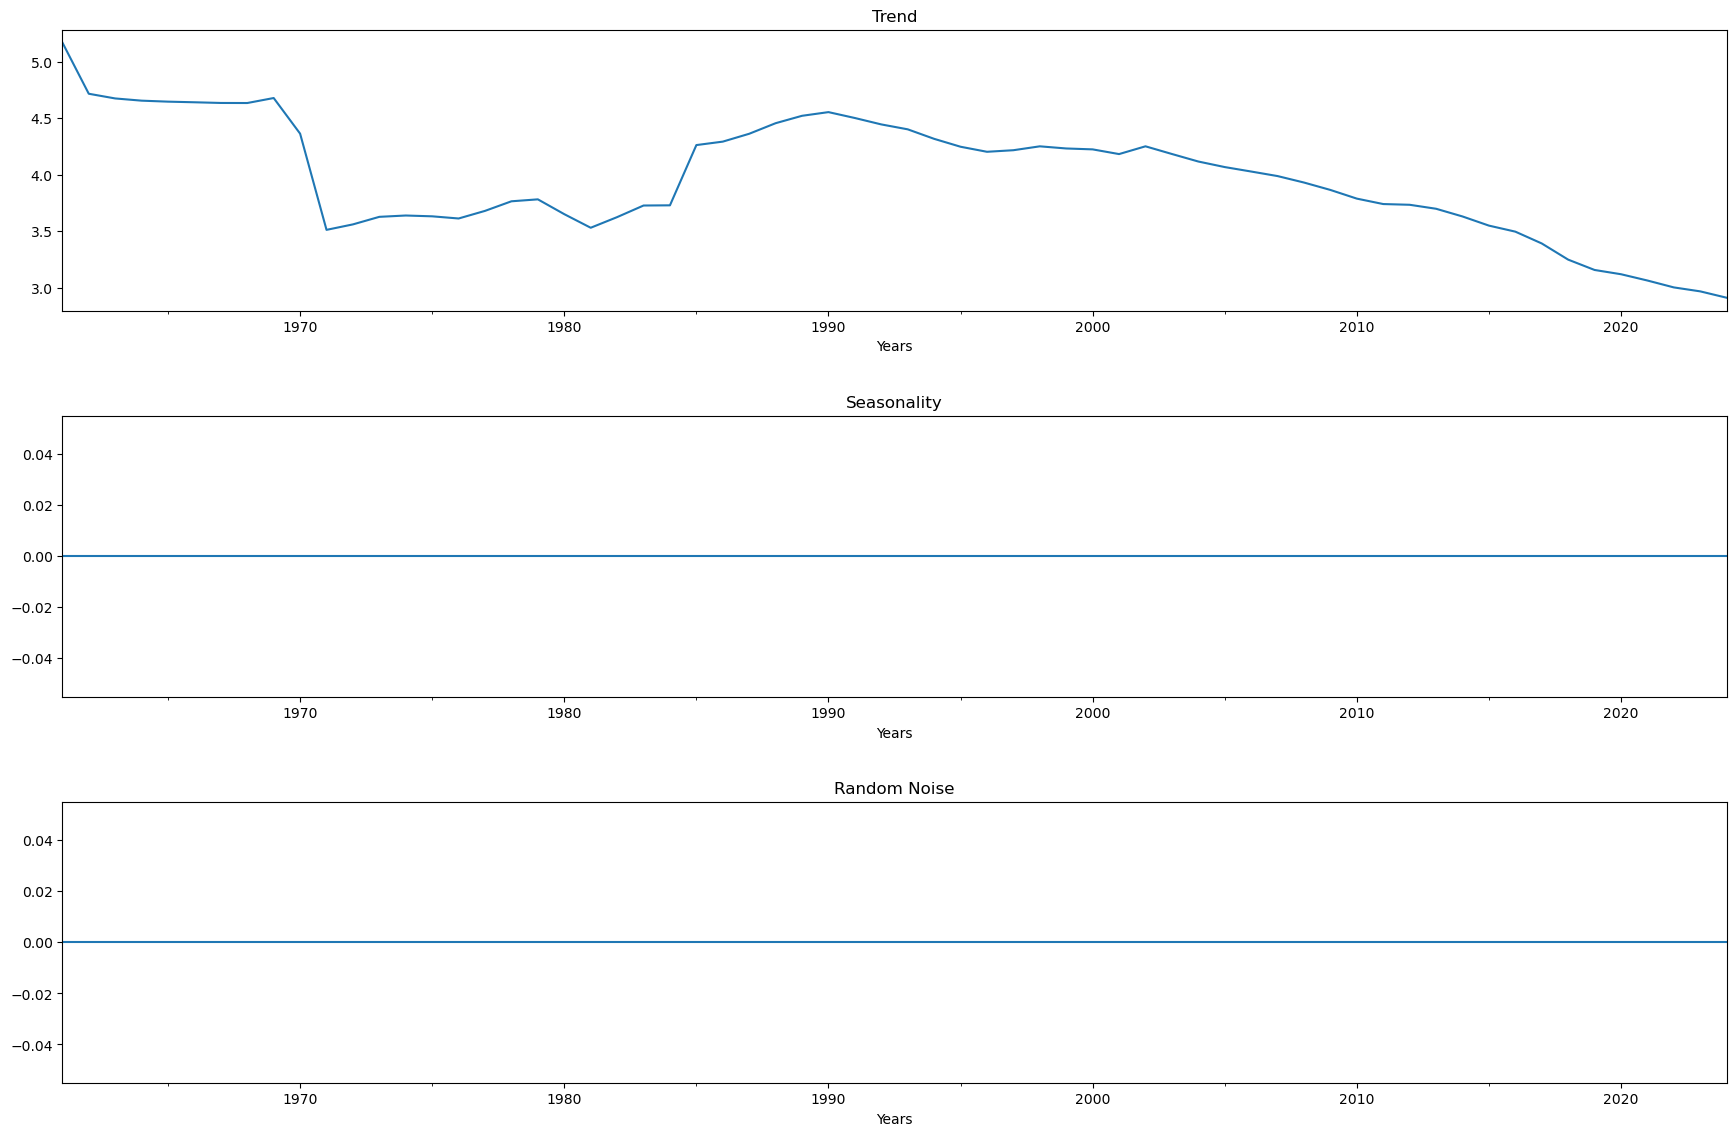

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1,figsize = (18,12))
decom_data['trend'].plot(ax = ax1)
ax1.set_title('Trend')
decom_data['seasonal'].plot(ax = ax2)
ax2.set_title('Seasonality')
decom_data['random_noise'].plot(ax = ax3)
ax3.set_title('Random Noise')
plt.tight_layout(pad=3.0)
plt.show()

In [25]:
#split data into train and test using on the year (1992-2012 for train and 2012-last year in dataset for test)
train_df = df.loc['1961-01-01':'2010-01-01']
test_df = df.loc['2010-01-01':]

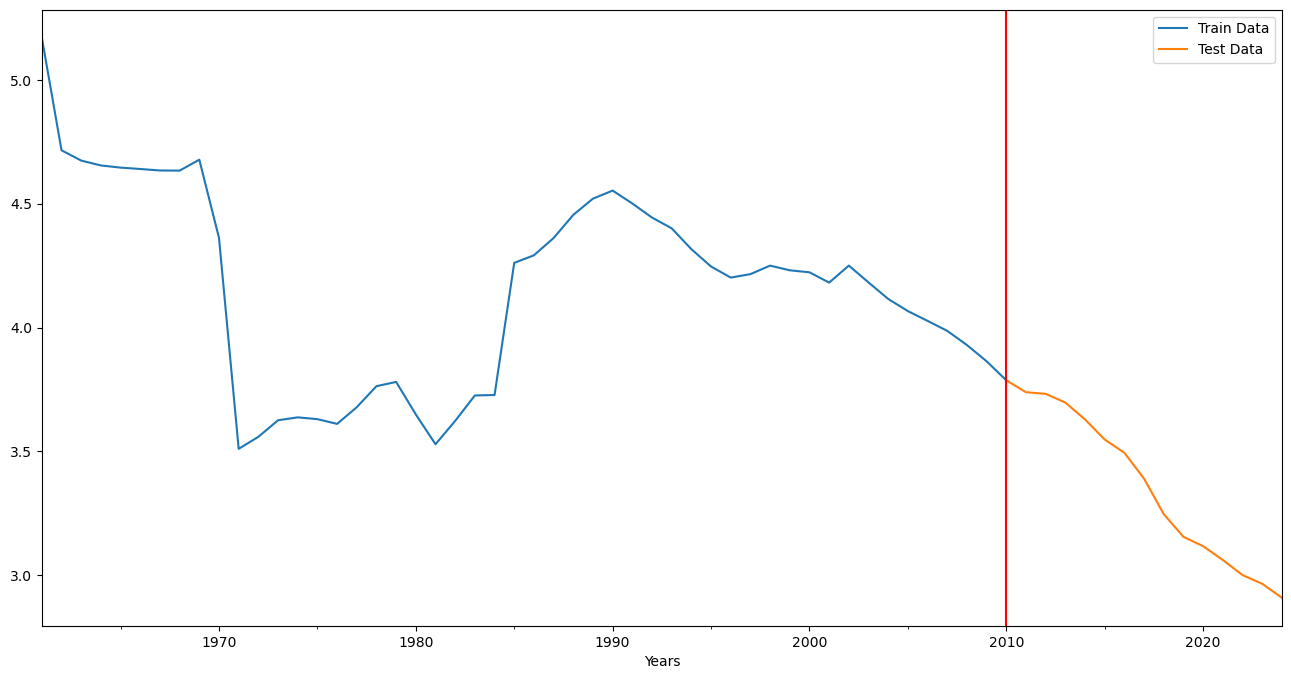

In [26]:
fig, ax = plt.subplots(figsize = (16,8))
train_df.plot(ax = ax)
test_df.plot(ax = ax)
plt.legend(['Train Data','Test Data'])
plt.axvline(x = '2010-01-01', color = 'red', linestyle = '-')
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [29]:
res = adfuller(train_df['pop_growth'])
print(res[0])
print(res[1])  #p-value
print(res[4])

-2.5707456009162404
0.09919554014255028
{'1%': np.float64(-3.5714715250448363), '5%': np.float64(-2.922629480573571), '10%': np.float64(-2.5993358475635153)}


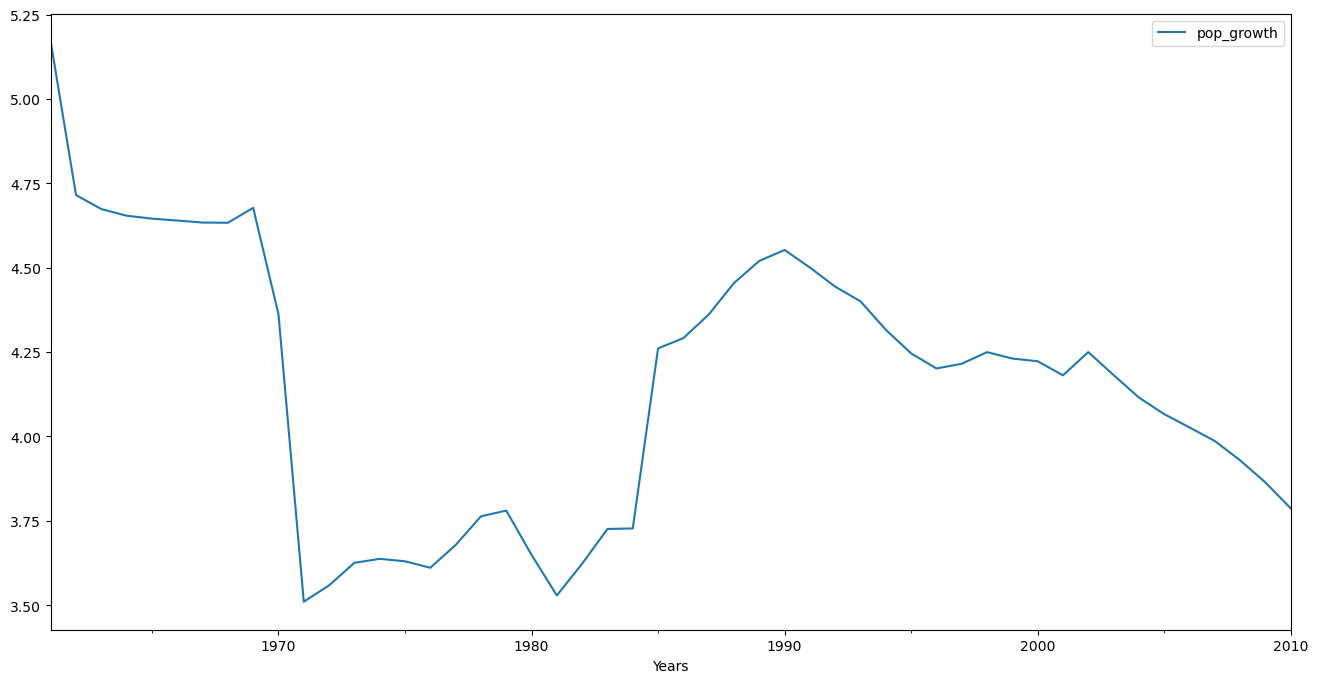

ADF Statistic: -2.5707456009162404
p-value: 0.09919554014255028


In [30]:
res = adfuller(train_df['pop_growth'])
fig, ax = plt.subplots(figsize = (16,8))
train_df.plot(ax = ax)
plt.show()

print('ADF Statistic:', res[0])
print('p-value:', res[1])

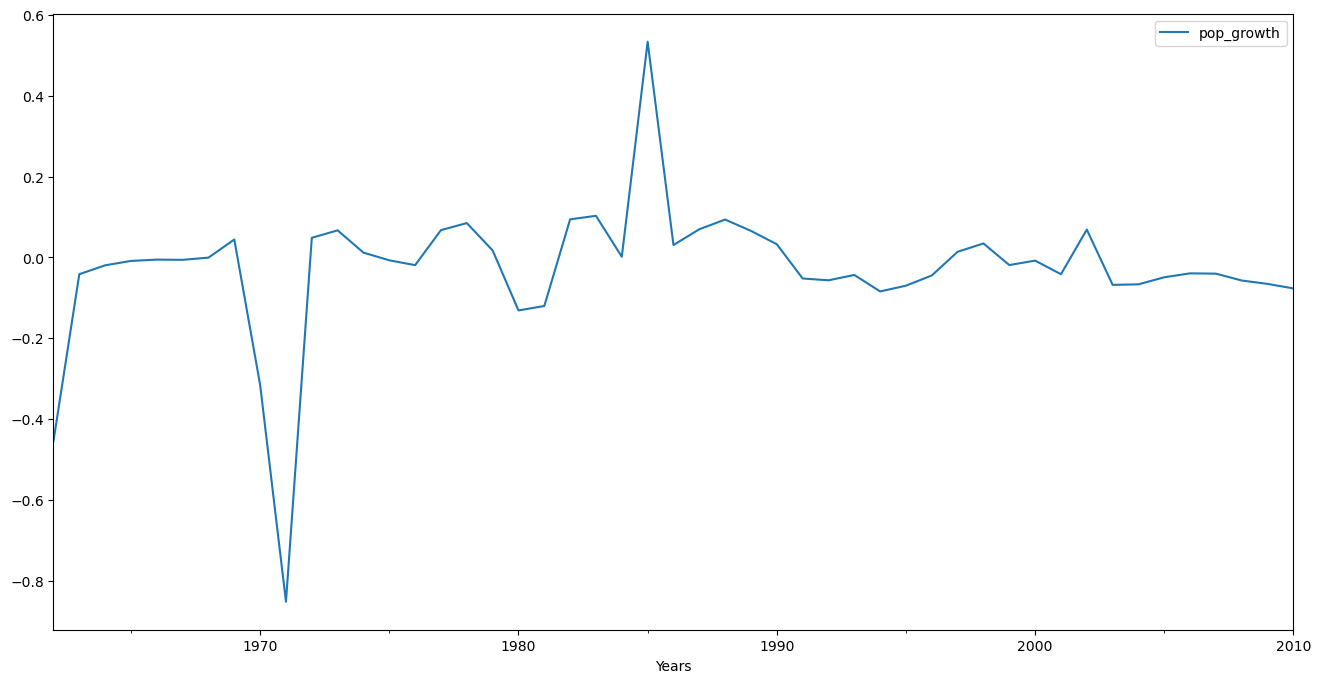

ADF Statistic: -5.90838182542643
p-value: 2.674825368186481e-07


In [31]:
train_df_station = train_df.diff().dropna()                 #first order differencing
res = adfuller(train_df_station['pop_growth'])
fig, ax = plt.subplots(figsize = (16,8))
train_df_station.plot(ax = ax)
plt.show()

print('ADF Statistic:', res[0])
print('p-value:', res[1])

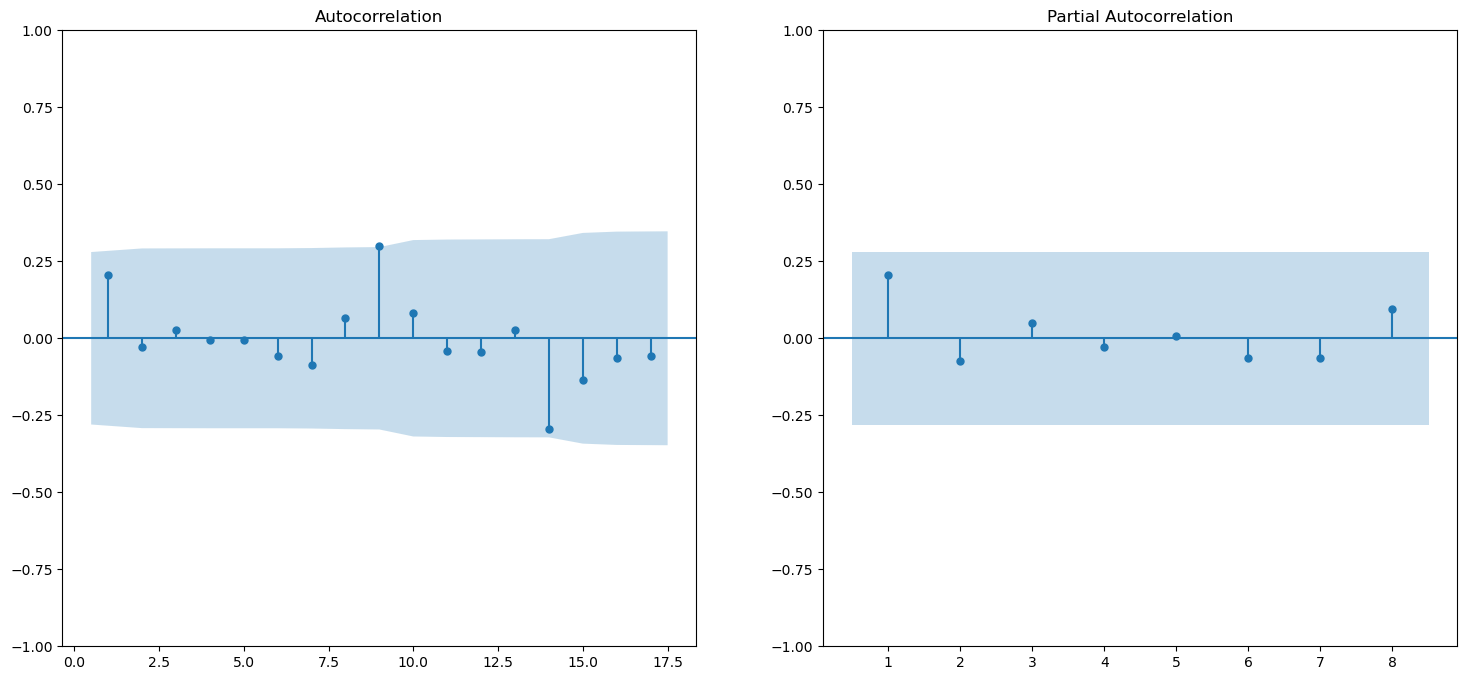

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18,8))
tsaplots.plot_acf(train_df_station, zero = False, ax = ax1)
tsaplots.plot_pacf(train_df_station, zero = False, ax = ax2, lags = 8)
plt.show()

In [54]:
ar1_model = ARIMA(train_df_station, order = (1,0,0))
ar1_model_res = ar1_model.fit()
ar9_model = ARIMA(train_df_station, order = (8,0,0))
ar9_model_res = ar9_model.fit()
ar14_model = ARIMA(train_df_station, order = (14,0,0))
ar14_model_res = ar14_model.fit()


C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

In [55]:
ar9_model_res.predict(start =48, end = 62)

2010-01-01   -0.023581
2011-01-01   -0.040259
2012-01-01   -0.031258
2013-01-01   -0.032425
2014-01-01   -0.029122
2015-01-01   -0.027268
2016-01-01   -0.027468
2017-01-01   -0.028630
2018-01-01   -0.033367
2019-01-01   -0.031835
2020-01-01   -0.030204
2021-01-01   -0.030683
2022-01-01   -0.030552
2023-01-01   -0.030234
2024-01-01   -0.029966
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [56]:
np.cumsum(np.cumsum(ar9_model_res.predict(start = 48, end = 62)))

2010-01-01   -0.023581
2011-01-01   -0.087421
2012-01-01   -0.182519
2013-01-01   -0.310042
2014-01-01   -0.466686
2015-01-01   -0.650599
2016-01-01   -0.861979
2017-01-01   -1.101990
2018-01-01   -1.375368
2019-01-01   -1.680581
2020-01-01   -2.015998
2021-01-01   -2.382098
2022-01-01   -2.778750
2023-01-01   -3.205636
2024-01-01   -3.662488
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [57]:
pred = np.cumsum(np.cumsum(np.cumsum(ar9_model_res.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]
pred

C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1332083972.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(ar9_model_res.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]


2010-01-01     3.763383
2011-01-01     3.675962
2012-01-01     3.493443
2013-01-01     3.183401
2014-01-01     2.716715
2015-01-01     2.066116
2016-01-01     1.204136
2017-01-01     0.102146
2018-01-01    -1.273223
2019-01-01    -2.953804
2020-01-01    -4.969802
2021-01-01    -7.351901
2022-01-01   -10.130651
2023-01-01   -13.336287
2024-01-01   -16.998775
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [58]:
def plot_pred_res (results, ax):
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]
  pred.index = test_df.index
  train_df.plot(ax = ax, label ='train',
                title = 'AIC: {}'. format(np.round(results.aic,2)) +
                ' , ' +
                'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_df, pred)),2)))
  test_df.plot(ax = ax)
  pred.plot(ax = ax)
  ax.legend(['train data', 'test data', 'forecasted values'])

C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]
C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]
C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

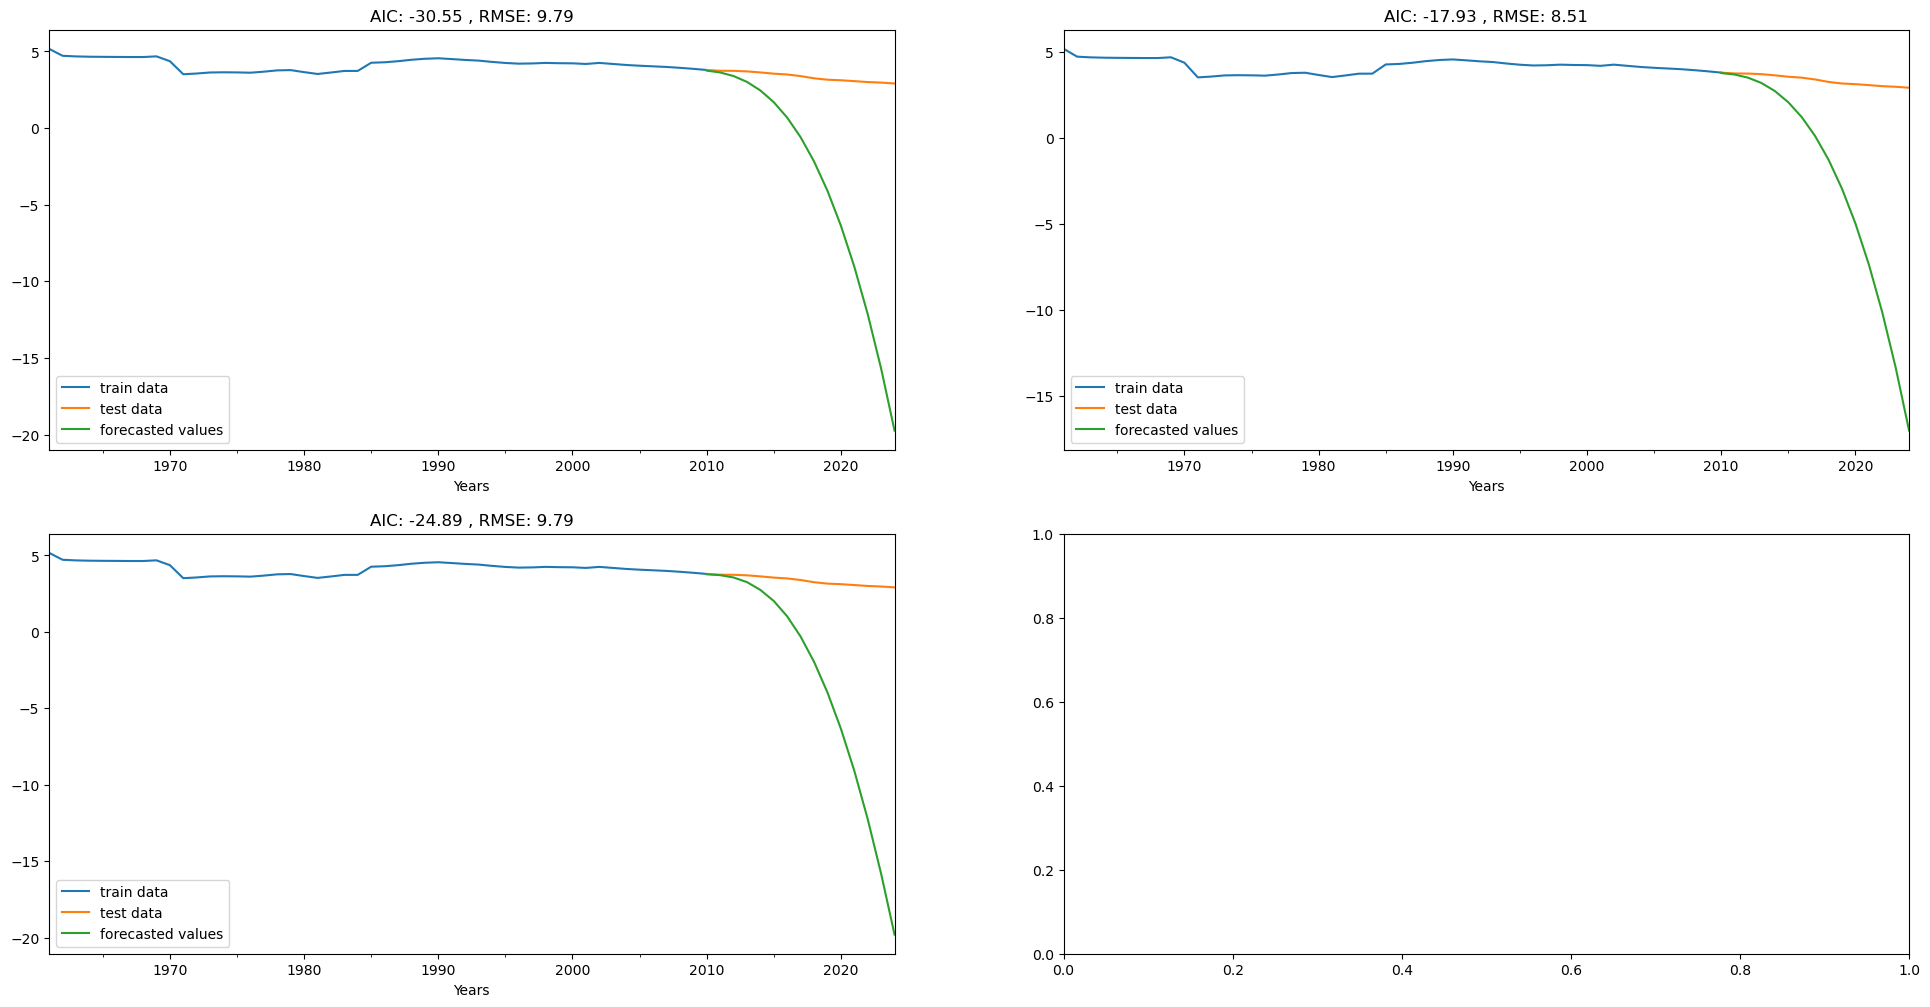

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (24,12))
plot_pred_res(ar1_model_res, ax1)
plot_pred_res(ar9_model_res, ax2)
plot_pred_res(ar14_model_res, ax3)
plt.show();

In [60]:
ar9_model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             pop_growth   No. Observations:                   49
Model:                 ARIMA(8, 0, 0)   Log Likelihood                  18.965
Date:                Sun, 14 Sep 2025   AIC                            -17.929
Time:                        16:15:32   BIC                              0.989
Sample:                    01-01-1962   HQIC                           -10.752
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0302      0.057     -0.526      0.599      -0.143       0.082
ar.L1          0.2629      0.162      1.622      0.105      -0.055       0.580
ar.L2         -0.1007      0.298     -0.338      0.736      -0.685       0.484
ar.L3          0.0706      0.358      0.197      0.844      -0.631       0.772
ar.L4         -0.0355      0.397     -0.089      0.929      -0.814       0.743
ar.L5          0.0130      0.677      0.019      0.985      -1.315       1.341
ar.L6         -0.0402      0.686     -0.059      0.953      -1.385       1.305
ar.L7         -0.0834      0.509     -0.164      0.870      -1.080       0.913
ar.L8          0.0931      0.196      0.475      0.635      -0.291       0.477
sigma2         0.0269      0.004      6.288      0.000       0.019       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               190.87
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
ma1_model = ARIMA(train_df_station, order = (0,0,1))
ma1_model_res = ma1_model.fit()
ma2_model = ARIMA(train_df_station, order = (0,0,2))
ma2_model_res = ma2_model.fit()
ma3_model = ARIMA(train_df_station, order = (0,0,3))
ma3_model_res = ma3_model.fit()
ma4_model = ARIMA(train_df_station, order = (0,0,4))
ma4_model_res = ma4_model.fit()

C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]
C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]
C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

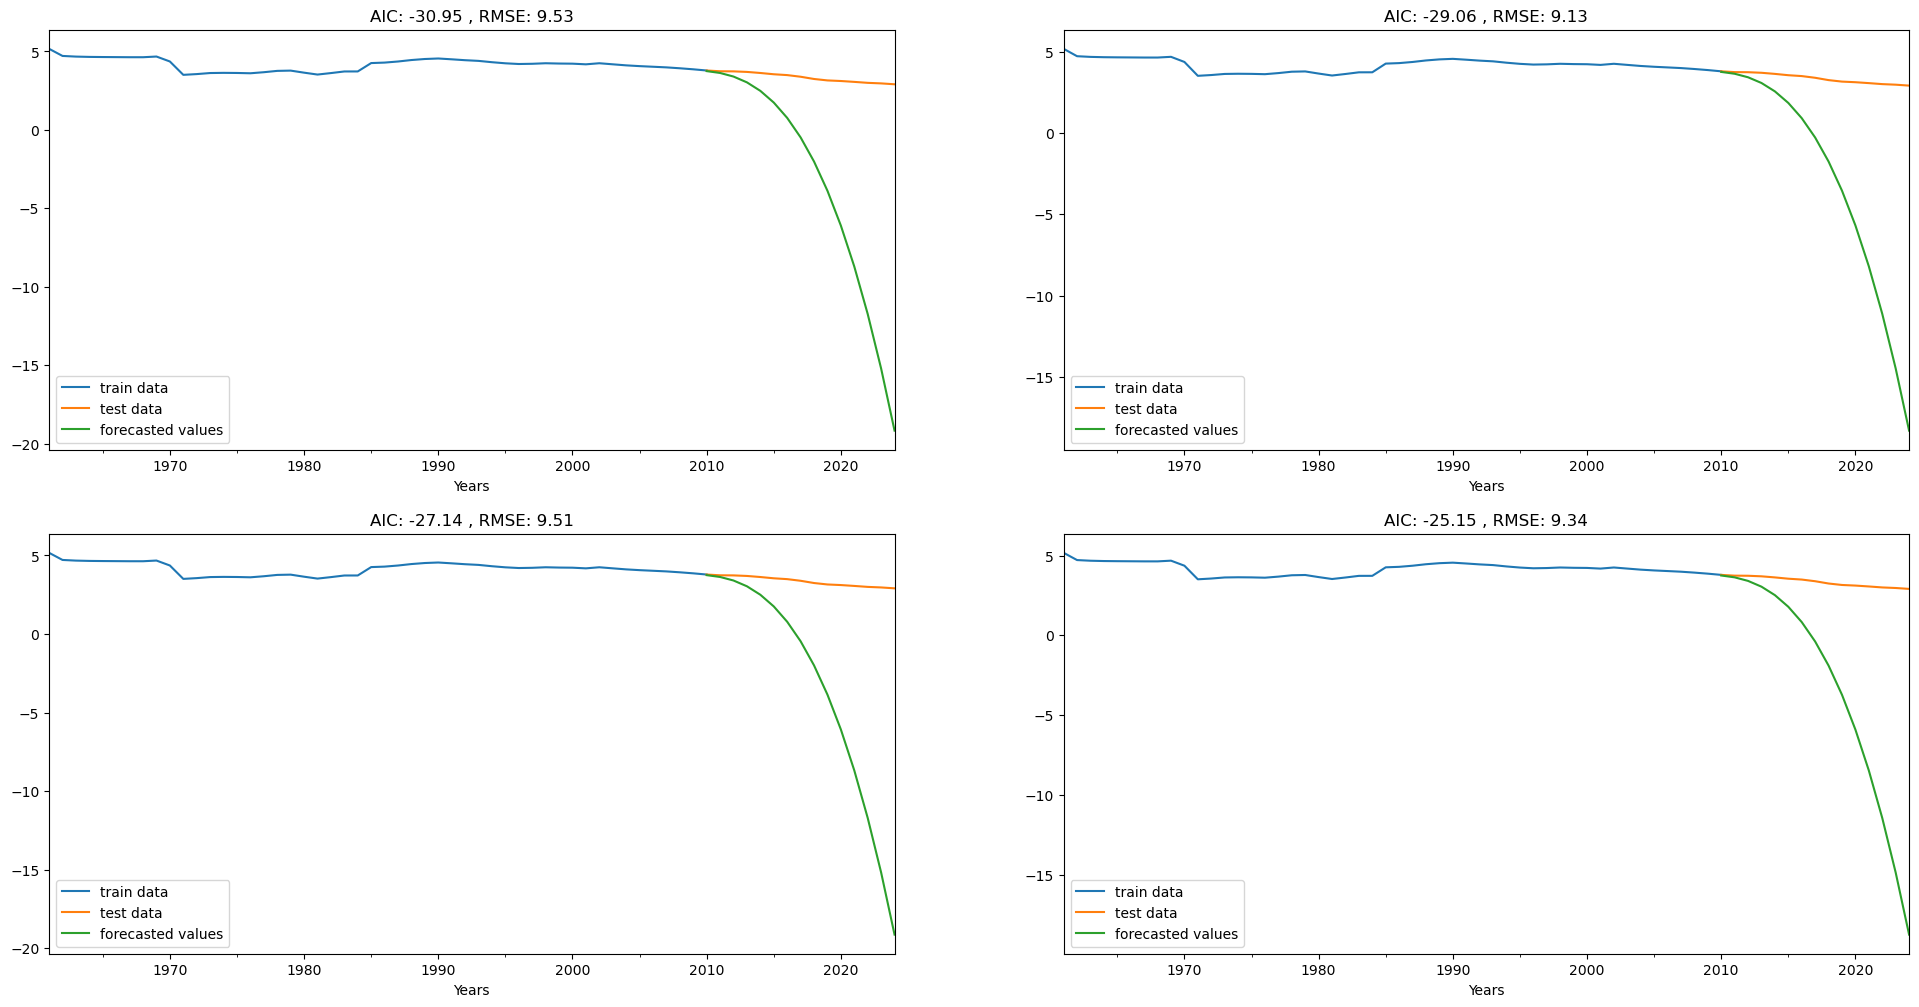

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (24,12))
plot_pred_res(ma1_model_res, ax1)
plot_pred_res(ma2_model_res, ax2)
plot_pred_res(ma3_model_res, ax3)
plot_pred_res(ma4_model_res, ax4)
plt.show()

In [63]:
ma2_model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             pop_growth   No. Observations:                   49
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  18.530
Date:                Sun, 14 Sep 2025   AIC                            -29.059
Time:                        16:16:55   BIC                            -21.492
Sample:                    01-01-1962   HQIC                           -26.188
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0302      0.039     -0.768      0.442      -0.107       0.047
ma.L1          0.2634      0.149      1.771      0.077      -0.028       0.555
ma.L2         -0.0503      0.223     -0.225      0.822      -0.488       0.387
sigma2         0.0274      0.003      8.527      0.000       0.021       0.034
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               181.00
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
ar8_ma2_model = ARIMA(train_df_station, order = (8,0,2))
ar8_ma2_model_res = ar8_ma2_model.fit()

C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]


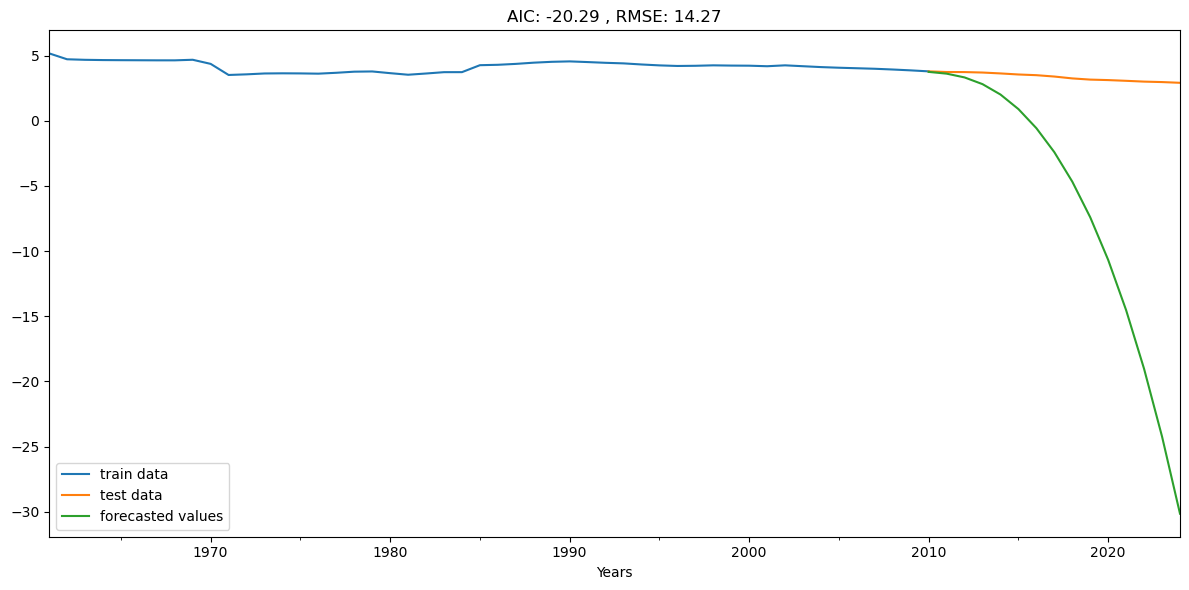

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))  # Create a single figure and axis
plot_pred_res(ar8_ma2_model_res, ax)     # Call your plotting function on this axis
plt.tight_layout()
plt.show()

In [80]:
ar8_ma2_model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             pop_growth   No. Observations:                   49
Model:                 ARIMA(8, 0, 2)   Log Likelihood                  22.143
Date:                Sun, 14 Sep 2025   AIC                            -20.285
Time:                        16:26:51   BIC                              2.416
Sample:                    01-01-1962   HQIC                           -11.672
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0429      0.099     -0.431      0.666      -0.238       0.152
ar.L1          1.4074      0.272      5.173      0.000       0.874       1.941
ar.L2         -1.1051      0.470     -2.351      0.019      -2.026      -0.184
ar.L3          0.3557      0.645      0.552      0.581      -0.908       1.619
ar.L4         -0.1730      0.594     -0.291      0.771      -1.337       0.991
ar.L5          0.1056      0.712      0.148      0.882      -1.289       1.500
ar.L6         -0.1007      0.939     -0.107      0.915      -1.942       1.741
ar.L7         -0.0657      0.891     -0.074      0.941      -1.813       1.681
ar.L8          0.2167      0.486      0.446      0.656      -0.736       1.169
ma.L1         -1.2141      0.240     -5.064      0.000      -1.684      -0.744
ma.L2          0.8372      0.290      2.891      0.004       0.270       1.405
sigma2         0.0224      0.006      3.911      0.000       0.011       0.034
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                54.27
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
train_df = train_df.astype('float32')

In [83]:
ar8_d1_ma2_model = ARIMA(train_df, order = (8,1,2))
ar8_d1_ma2_model_res = ar8_d1_ma2_model.fit()

C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
ar8_d1_ma2_model_res.predict(start = 48, end = 62)

2009-01-01    3.915044
2010-01-01    3.843942
2011-01-01    3.752594
2012-01-01    3.713967
2013-01-01    3.671063
2014-01-01    3.644593
2015-01-01    3.639322
2016-01-01    3.646486
2017-01-01    3.650223
2018-01-01    3.634907
2019-01-01    3.608423
2020-01-01    3.583791
2021-01-01    3.565585
2022-01-01    3.554445
2023-01-01    3.550927
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [85]:
def plot_pred_res_new (results, ax):
  pred = results.predict(start = 48, end = 62)
  pred.index = test_df.index
  train_df.plot(ax = ax, label ='train',
                title = 'AIC: {}'. format(np.round(results.aic,2)) +
                ' , ' +
                'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_df, pred)),2)))
  test_df.plot(ax = ax)
  pred.plot(ax = ax)
  ax.legend(['train data', 'test data', 'forecasted values'])

C:\Users\Kahad_09\AppData\Local\Temp\ipykernel_41848\1640220569.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = np.cumsum(np.cumsum(np.cumsum(results.predict(start = 48, end = 62)))) + train_df.iloc[-1][0]


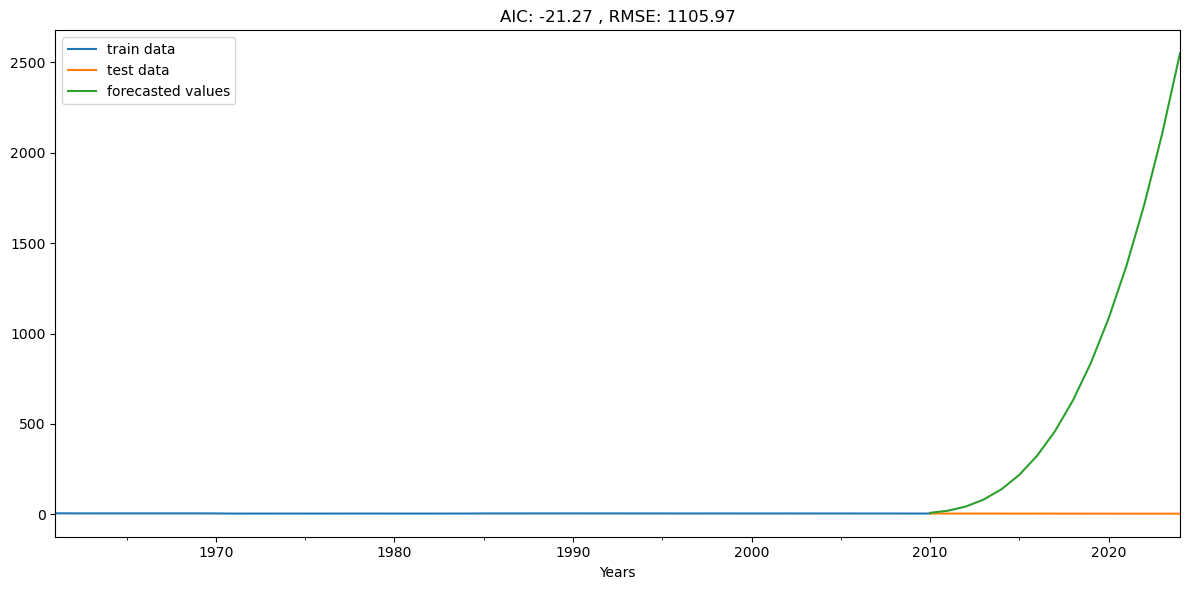

In [87]:
fig, ax = plt.subplots(figsize=(12, 6))  # Create a single figure and axis
plot_pred_res(ar8_d1_ma2_model_res, ax)     # Call your plotting function on this axis
plt.tight_layout()
plt.show()

In [88]:
ar8_d1_ma2_model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             pop_growth   No. Observations:                   50
Model:                 ARIMA(8, 1, 2)   Log Likelihood                  21.636
Date:                Sun, 14 Sep 2025   AIC                            -21.273
Time:                        16:37:24   BIC                             -0.463
Sample:                    01-01-1961   HQIC                           -13.378
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4109      0.278      5.077      0.000       0.866       1.956
ar.L2         -1.0750      0.476     -2.256      0.024      -2.009      -0.141
ar.L3          0.3242      0.698      0.465      0.642      -1.043       1.691
ar.L4         -0.1391      0.714     -0.195      0.845      -1.538       1.260
ar.L5          0.0777      0.723      0.108      0.914      -1.339       1.494
ar.L6         -0.0652      0.861     -0.076      0.940      -1.753       1.623
ar.L7         -0.0703      0.776     -0.091      0.928      -1.591       1.450
ar.L8          0.2143      0.404      0.531      0.596      -0.577       1.006
ma.L1         -1.2173      0.260     -4.689      0.000      -1.726      -0.708
ma.L2          0.8423      0.278      3.034      0.002       0.298       1.386
sigma2         0.0233      0.006      3.606      0.000       0.011       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                56.72
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
final_model = ARIMA(df, order = (8,1,2))
final_model_res = final_model.fit()

C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kahad_09\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [91]:
forecasted = final_model_res.predict(start = '2010-01-01', end = '2025-01-01')

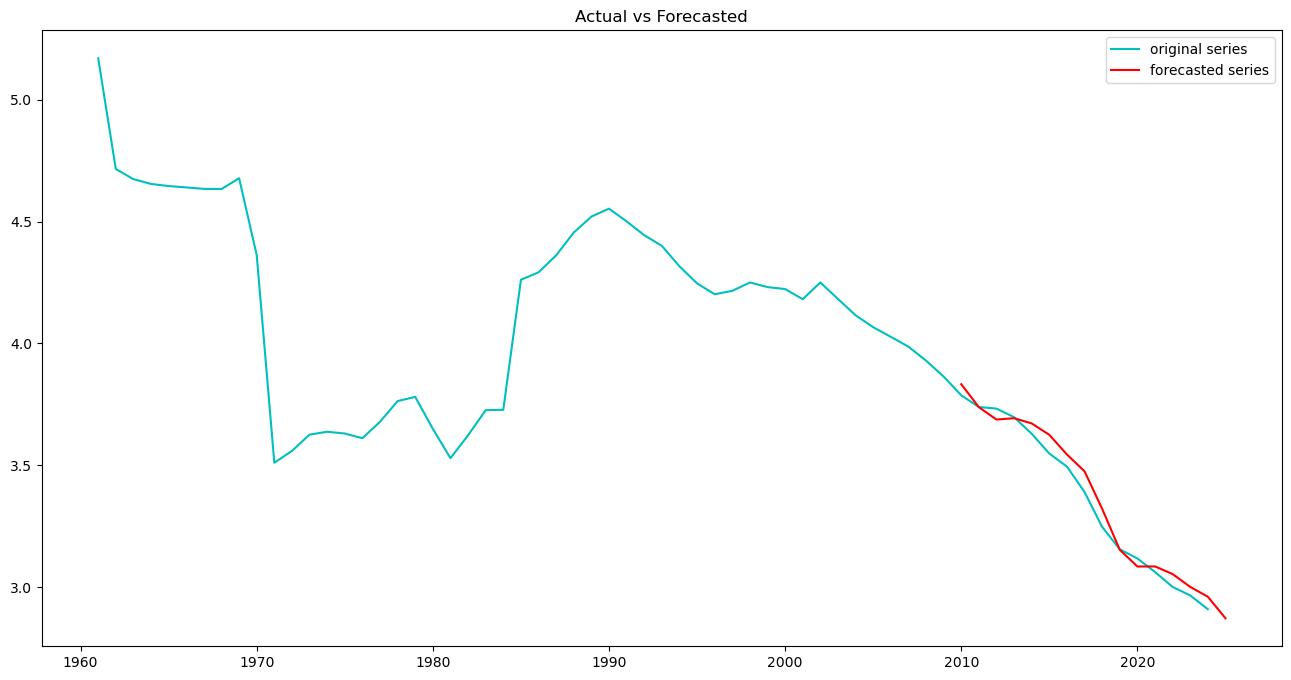

In [92]:
plt.figure(figsize = (16,8))
plt.plot(df, color = 'c', label='original series')
plt.plot(forecasted, color = 'r', label = 'forecasted series')
plt.title('Actual vs Forecasted')
plt.legend()
plt.show()

In [97]:
!conda install -c conda-forge pmdarima -y

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\Kahad_09\anaconda3

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.8.3   |       h4c7d964_0         151 KB  conda-forge
    certifi-2025.8.3           |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-25.7.0               |  py313hfa70ccb_0         1.2 MB  conda-forge
    cython-3.1.3               |   pyha292242_102         884 KB  conda-forge
    openssl-3.1.0              |       hcfcfb64_3         7.1 MB  conda-forge
    pmdarima-2.0.4             |  py313h2cb717b_0         615 KB
    ucrt-10.0.26100.0          |       h57928b3_0         678 KB  conda-forge
    ------------------------------------------------------------
      



==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [98]:
import pmdarima as pm

In [99]:
# Fit auto ARIMA model on your data
auto_arima_model = pm.auto_arima(train_df, d = 1, seasonal=False, trace=True,
                      error_action='ignore', suppress_warnings=True)

print(auto_arima_model.summary())

C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-26.799, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-30.133, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-30.550, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-30.950, Time=0.09 sec


C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-30.814, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29.102, Time=0.14 sec


C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-29.059, Time=0.09 sec


C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31.916, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-30.006, Time=0.15 sec


C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-29.975, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-31.553, Time=0.06 sec


C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Kahad_09\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.209 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  17.958
Date:                Sun, 14 Sep 2025   AIC                            -31.916
Time:                        18:19:19   BIC                            -28.132
Sample:                    01-01-1961   HQIC                           -30.481
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2847      0.112      2.534      0.011       0.064      

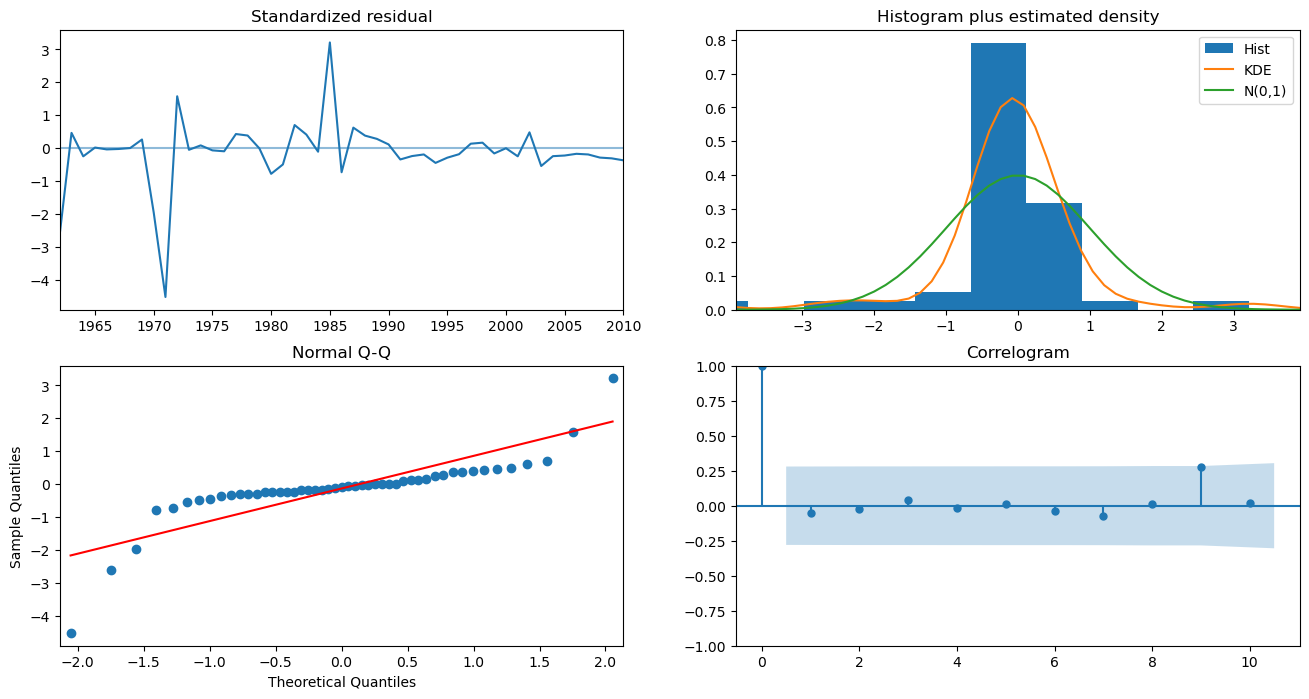

In [100]:
fig = plt.figure(figsize = (16,8))
fig = auto_arima_model.plot_diagnostics(fig = fig)
plt.show()